In [1]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from networkx.algorithms.community import greedy_modularity_communities
import numpy as np
import zipfile


Lettura files

In [17]:
# Carica il file dei dati
data = pd.read_csv('soc-dolphins.txt', delimiter=' ', header=None, names=['src', 'target'])

# Crea un grafo vuoto (grafo non diretto, se vuoi un grafo diretto usa nx.DiGraph())
G = nx.Graph()

# Aggiungi i nodi e gli archi
for index, row in data.iterrows():
    G.add_node(row['src'], type='src')  # Aggiungi il delfino come nodo
    G.add_node(row['target'], type='target')  # Aggiungi il gruppo come nodo
    G.add_edge(row['src'], row['target'])  # Crea un arco tra il delfino e il gruppo

# Visualizzare i nodi e gli archi
print("Nodi:", G.nodes(data=True))
print("Archi:", G.edges())


Nodi: [(11, {'type': 'target'}), (1, {'type': 'target'}), (15, {'type': 'target'}), (16, {'type': 'target'}), (41, {'type': 'target'}), (43, {'type': 'target'}), (48, {'type': 'src'}), (18, {'type': 'target'}), (2, {'type': 'target'}), (20, {'type': 'target'}), (27, {'type': 'target'}), (28, {'type': 'src'}), (29, {'type': 'target'}), (37, {'type': 'target'}), (42, {'type': 'target'}), (55, {'type': 'target'}), (3, {'type': 'target'}), (45, {'type': 'src'}), (62, {'type': 'src'}), (9, {'type': 'target'}), (4, {'type': 'target'}), (60, {'type': 'src'}), (52, {'type': 'target'}), (5, {'type': 'target'}), (10, {'type': 'target'}), (6, {'type': 'target'}), (14, {'type': 'target'}), (57, {'type': 'src'}), (58, {'type': 'src'}), (7, {'type': 'target'}), (8, {'type': 'target'}), (31, {'type': 'target'}), (21, {'type': 'target'}), (38, {'type': 'target'}), (46, {'type': 'target'}), (33, {'type': 'target'}), (30, {'type': 'target'}), (12, {'type': 'target'}), (34, {'type': 'target'}), (13, {'ty

In [3]:
def analizza_grafo(G: nx.Graph):
    # Numero di nodi
    n_nodi = G.number_of_nodes()
    # Numero di archi
    n_archi = G.number_of_edges()
    # Densità
    densita = nx.density(G)
    # Connessione
    connesso = nx.is_connected(G)
    
    # Se il grafo è connesso, calcolo raggio, diametro e periferia
    if connesso:
        raggio = nx.radius(G)
        diametro = nx.diameter(G)
        periferia = list(nx.periphery(G))
    else:
        raggio = None
        diametro = None
        periferia = None
    
    # Average clustering coefficient
    clustering_medio = nx.average_clustering(G)
    
    # Stampa dei risultati
    print(f"Numero di nodi: {n_nodi}")
    print(f"Numero di archi: {n_archi}")
    print(f"Densità: {densita:.4f}")
    print(f"Connesso: {connesso}")
    
    if connesso:
        print(f"Raggio: {raggio}")
        print(f"Diametro: {diametro}")
        print(f"Periferia: {periferia}")
    else:
        print("Raggio, diametro e periferia non definiti su grafo non connesso.")
    
    print(f"Average clustering coefficient: {clustering_medio:.4f}")


    
    

In [4]:
analizza_grafo(G)

Numero di nodi: 62
Numero di archi: 159
Densità: 0.0841
Connesso: True
Raggio: 5
Diametro: 8
Periferia: [5, 12, 36, 61, 50, 59, 47, 54]
Average clustering coefficient: 0.2590


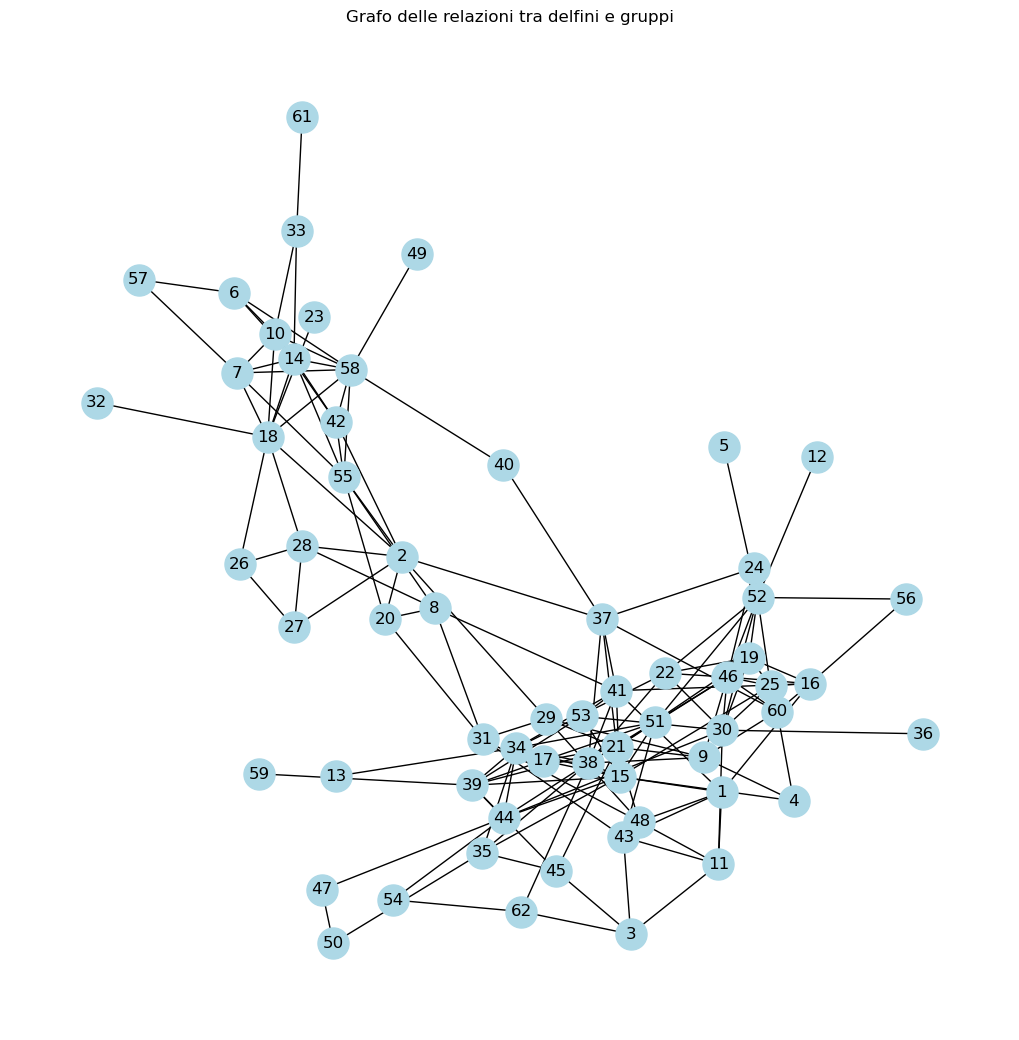

In [ ]:
# Visualizzazione spring
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

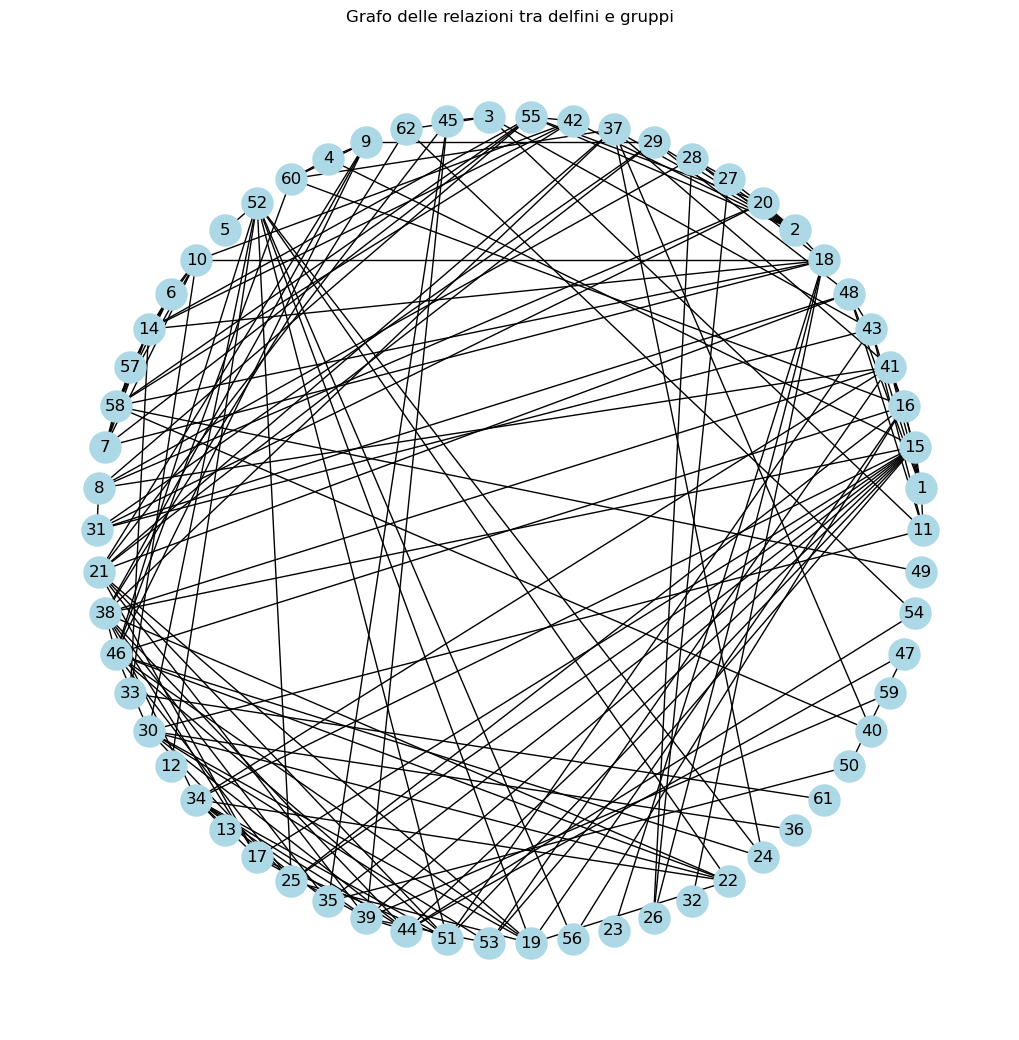

In [22]:
# Visualizzazione spiral
pos = nx.circular_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

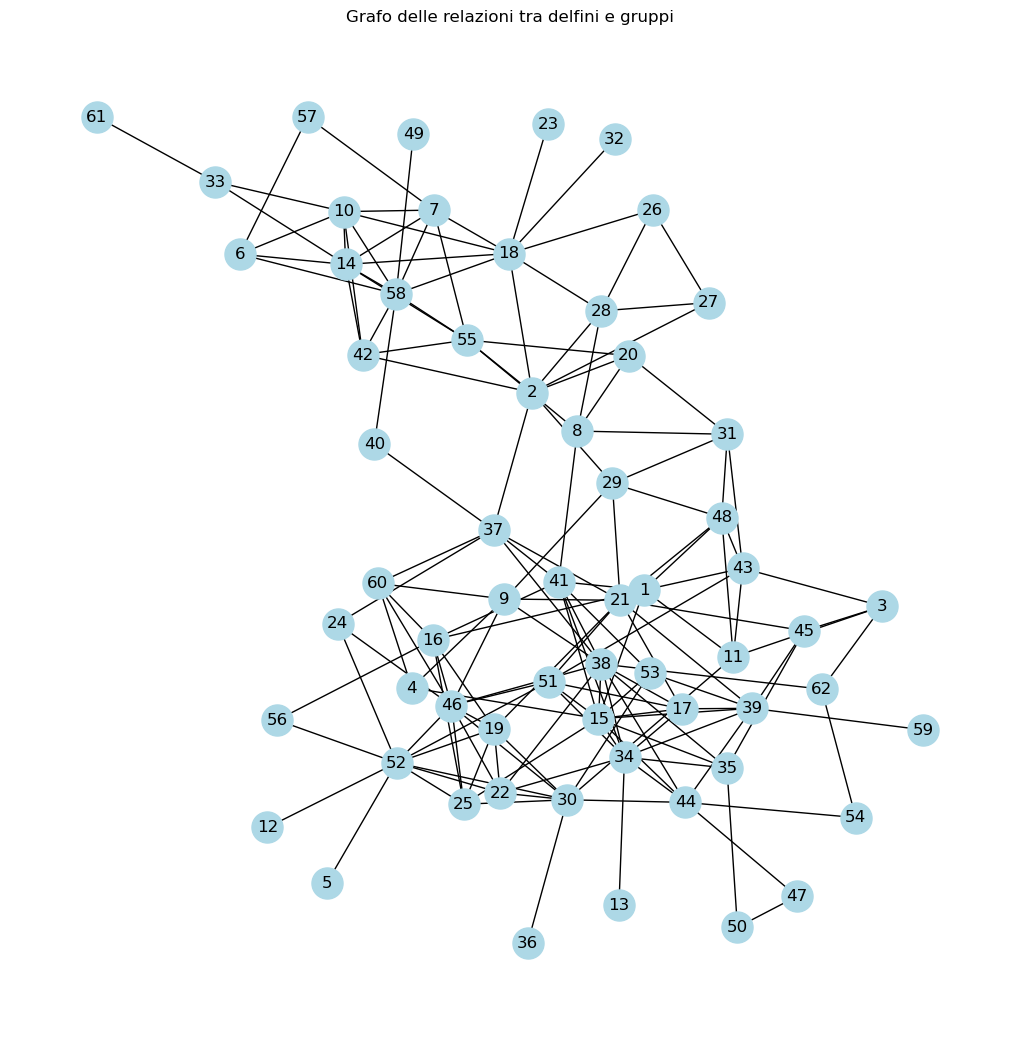

In [ ]:
# Visualizzazione kamada-kawai
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

In [26]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)


In [27]:
centrality_df = pd.DataFrame({
    "Node": list(G.nodes),
    "Degree Centrality": [degree_centrality[node] for node in G.nodes],
    "Closeness Centrality": [closeness_centrality[node] for node in G.nodes],
    "Betweenness Centrality": [betweenness_centrality[node] for node in G.nodes],
    "Eigenvector Centrality": [eigenvector_centrality[node] for node in G.nodes]
})

In [28]:

centrality_sorted_df = centrality_df.copy()
centrality_sorted_df["Node"] = centrality_sorted_df["Node"].astype(str)


degree_sorted = centrality_sorted_df.sort_values("Degree Centrality", ascending=False)
print("degree_sorted done")
closeness_sorted = centrality_sorted_df.sort_values("Closeness Centrality", ascending=False)
print("closeness_sorted done")
betweenness_sorted = centrality_sorted_df.sort_values("Betweenness Centrality", ascending=False)
print("betweenness_sorted done")
eigenvector_sorted = centrality_sorted_df.sort_values("Eigenvector Centrality", ascending=False)
print("eigenvector_sorted done")


degree_sorted done
closeness_sorted done
betweenness_sorted done
eigenvector_sorted done


In [29]:
print("Top 5 Degree Centrality:\n", degree_sorted.head(), "\n")
print("Bottom 5 Degree Centrality:\n", degree_sorted.tail(), "\n")

print("Top 5 Closeness Centrality:\n", closeness_sorted.head(), "\n")
print("Bottom 5 Closeness Centrality:\n", closeness_sorted.tail(), "\n")

print("Top 5 Betweenness Centrality:\n", betweenness_sorted.head(), "\n")
print("Bottom 5 Betweenness Centrality:\n", betweenness_sorted.tail(), "\n")

print("Top 5 Eigenvector Centrality:\n", eigenvector_sorted.head(), "\n")
print("Bottom 5 Eigenvector Centrality:\n", eigenvector_sorted.tail(), "\n")


Top 5 Degree Centrality:
    Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
2    15           0.196721              0.376543                0.061972   
34   46           0.180328              0.346591                0.040670   
33   38           0.180328              0.398693                0.138570   
22   52           0.163934              0.329730                0.084677   
38   34           0.163934              0.365269                0.057166   

    Eigenvector Centrality  
2                 0.315781  
34                0.285003  
33                0.300561  
22                0.210680  
38                0.281097   

Bottom 5 Degree Centrality:
    Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
39   13           0.016393              0.268722                     0.0   
49   23           0.016393              0.237354                     0.0   
23    5           0.016393              0.248980                     0.0   
37   12 

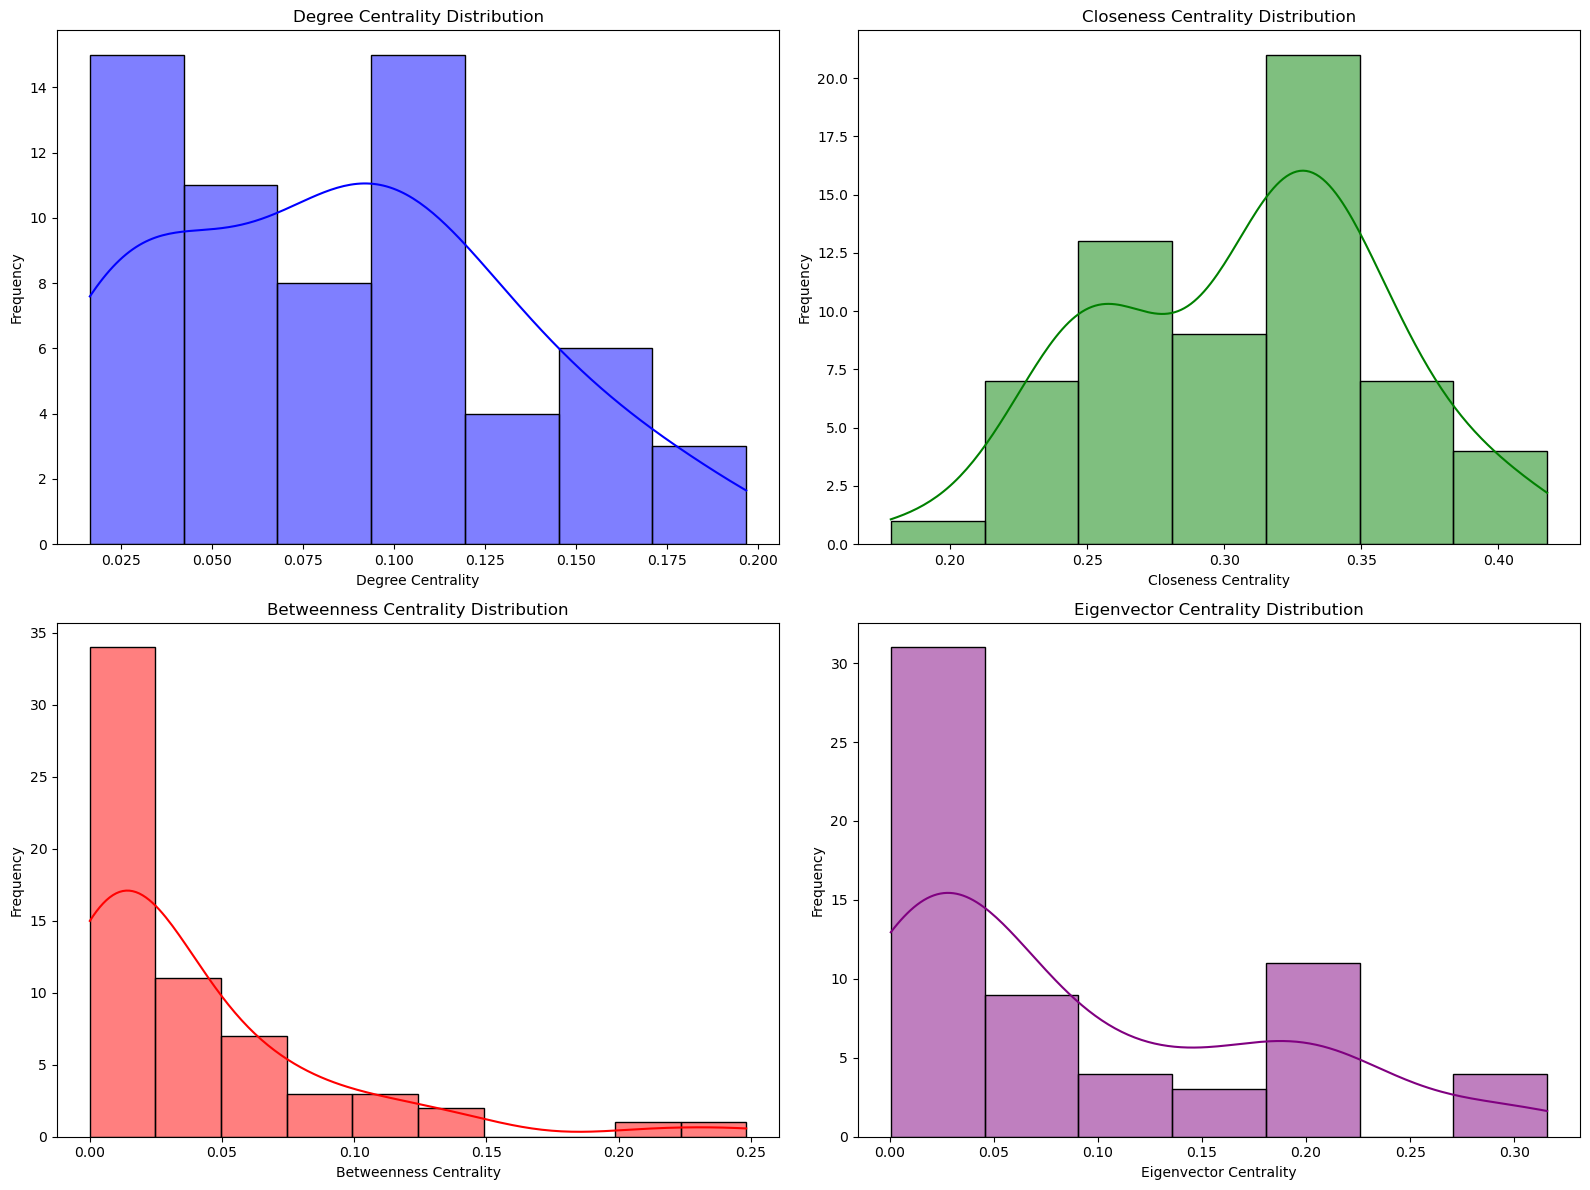

In [30]:
# Visualizzazione con distplot per ogni tipo di centralità
plt.figure(figsize=(16, 12))

# Degree Centrality Distplot
plt.subplot(2, 2, 1)
sns.histplot(degree_sorted['Degree Centrality'], kde=True, color='blue')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

# Closeness Centrality Distplot
plt.subplot(2, 2, 2)
sns.histplot(closeness_sorted['Closeness Centrality'], kde=True, color='green')
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

# Betweenness Centrality Distplot
plt.subplot(2, 2, 3)
sns.histplot(betweenness_sorted['Betweenness Centrality'], kde=True, color='red')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

# Eigenvector Centrality Distplot
plt.subplot(2, 2, 4)
sns.histplot(eigenvector_sorted['Eigenvector Centrality'], kde=True, color='purple')
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

# Mostra il grafico
plt.tight_layout()
plt.show()

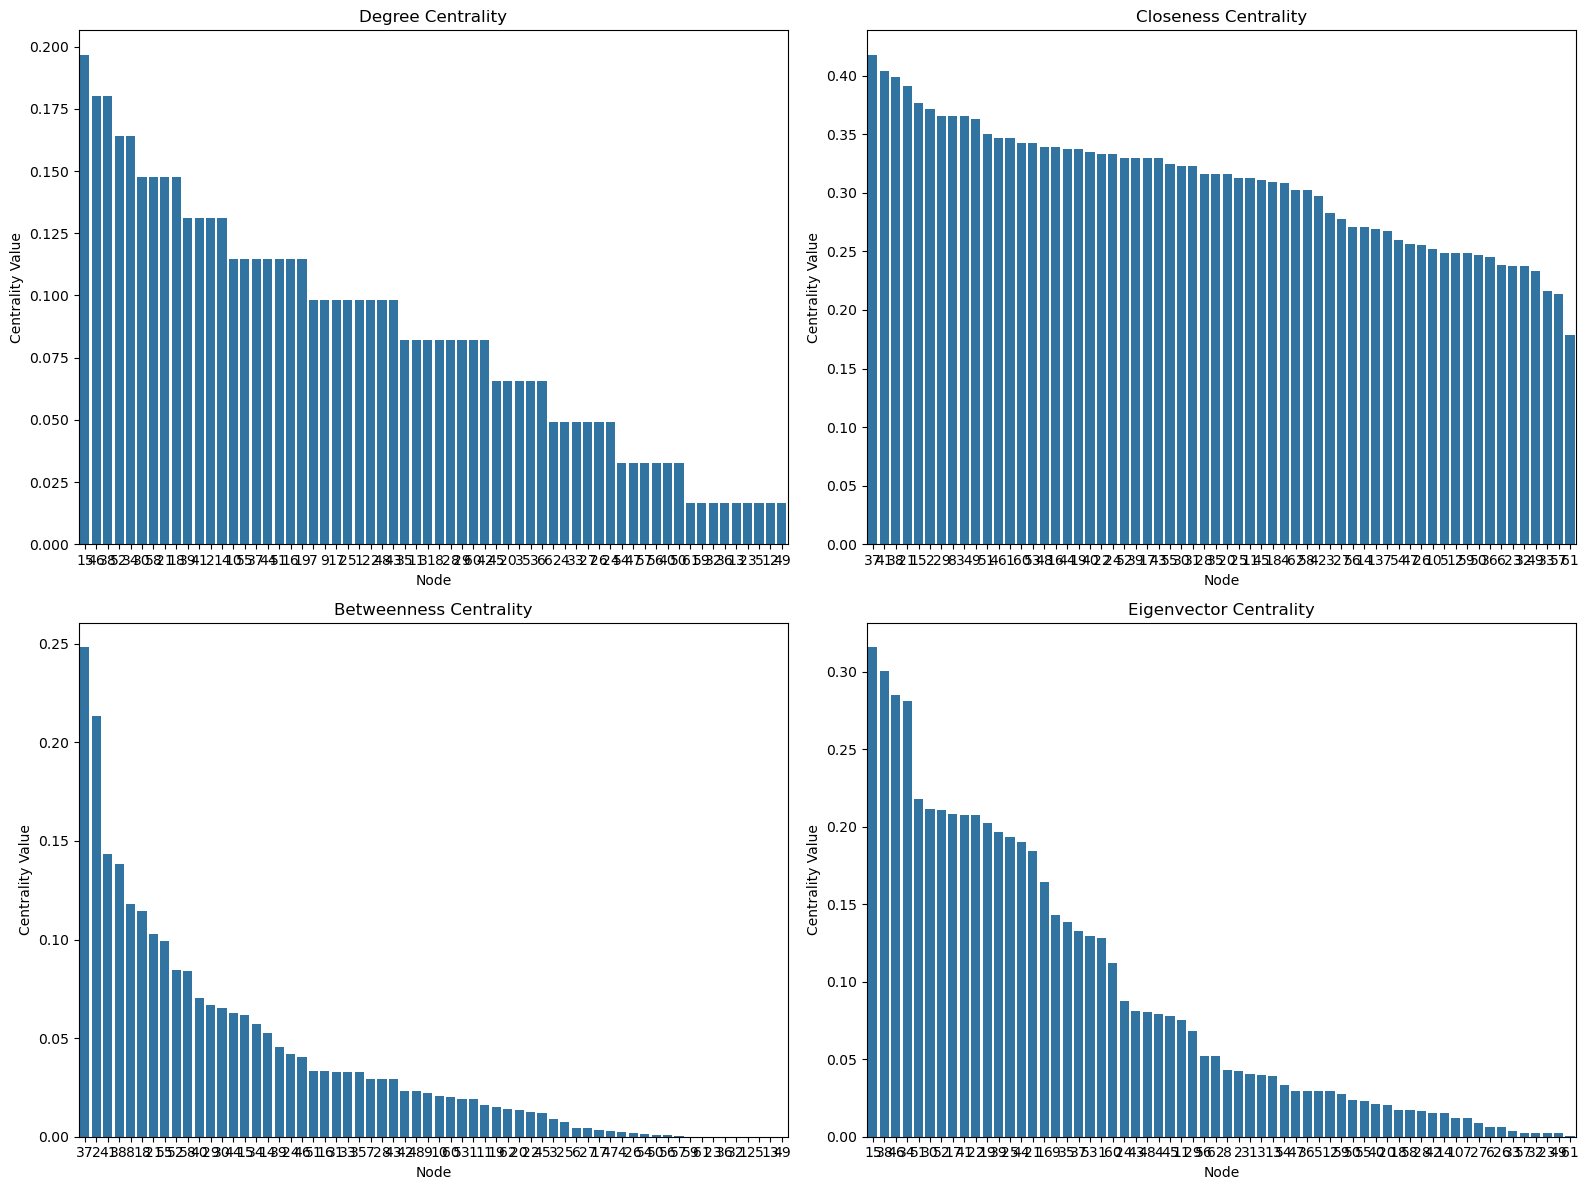

In [31]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.barplot(x="Node", y="Degree Centrality", data=degree_sorted)
plt.title("Degree Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 2)
sns.barplot(x="Node", y="Closeness Centrality", data=closeness_sorted)
plt.title("Closeness Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 3)
sns.barplot(x="Node", y="Betweenness Centrality", data=betweenness_sorted)
plt.title("Betweenness Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 4)
sns.barplot(x="Node", y="Eigenvector Centrality", data=eigenvector_sorted)
plt.title("Eigenvector Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")

plt.tight_layout()
plt.show()


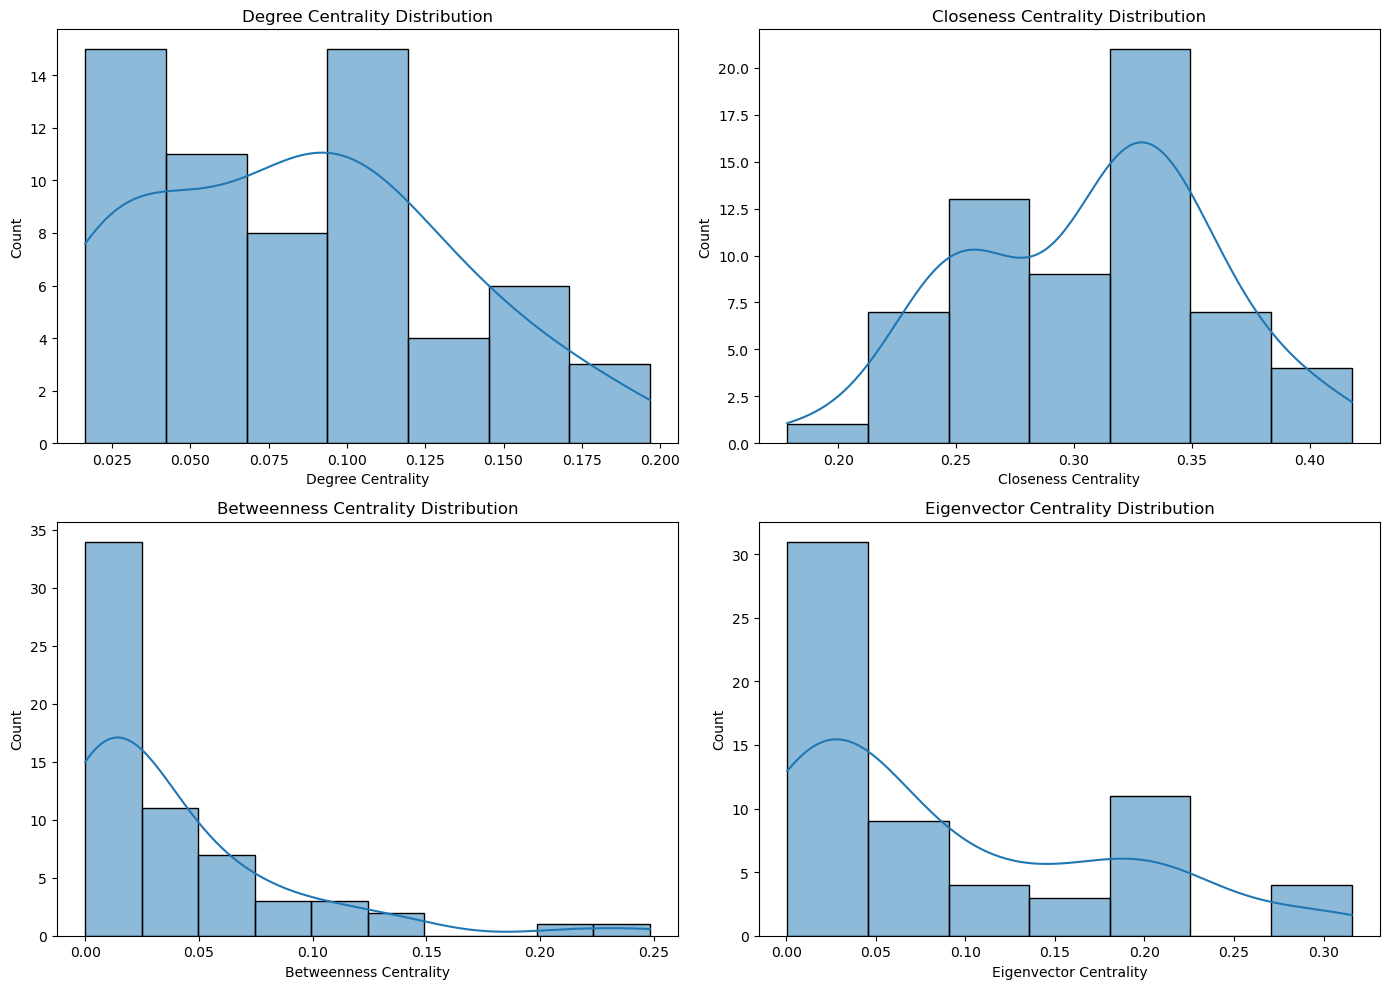

In [32]:

plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.histplot(centrality_df["Degree Centrality"], kde=True)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 2)
sns.histplot(centrality_df["Closeness Centrality"], kde=True)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 3)
sns.histplot(centrality_df["Betweenness Centrality"], kde=True)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 4)
sns.histplot(centrality_df["Eigenvector Centrality"], kde=True)
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


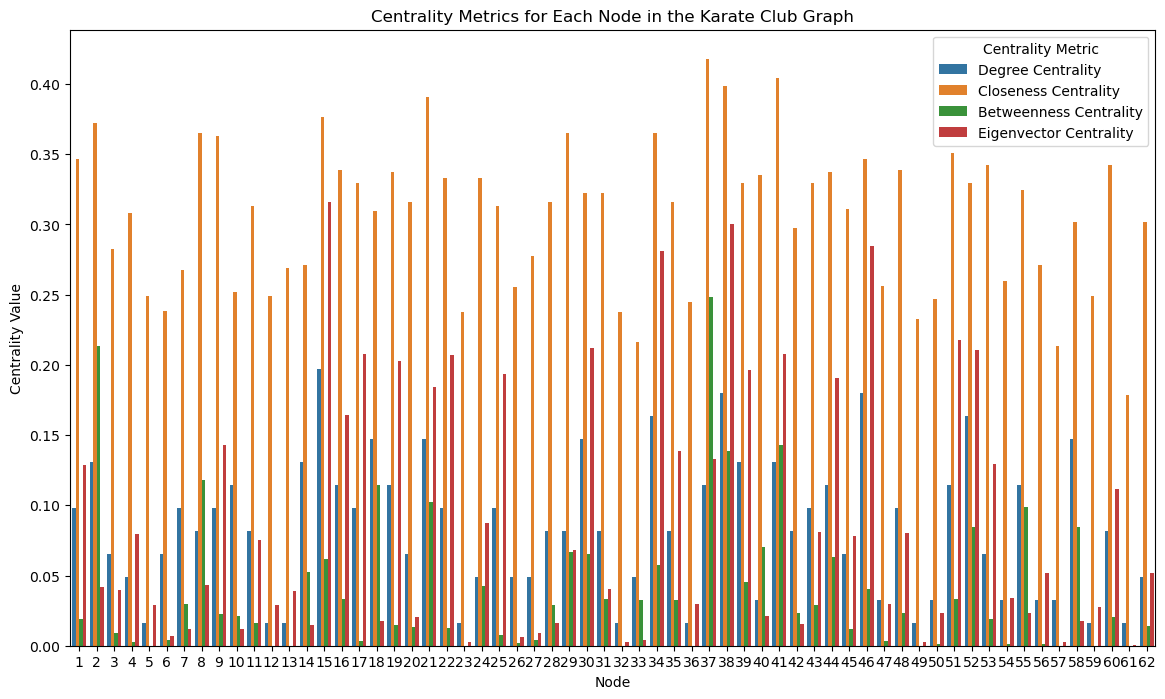

In [33]:
plt.figure(figsize=(14, 8))
sns.barplot(data=pd.melt(centrality_df, id_vars="Node", var_name="Centrality Metric", value_name="Value"), 
            x="Node", y="Value", hue="Centrality Metric")
plt.title("Centrality Metrics for Each Node in the Karate Club Graph")
plt.xlabel("Node")
plt.ylabel("Centrality Value")
plt.legend(title="Centrality Metric")
plt.show()

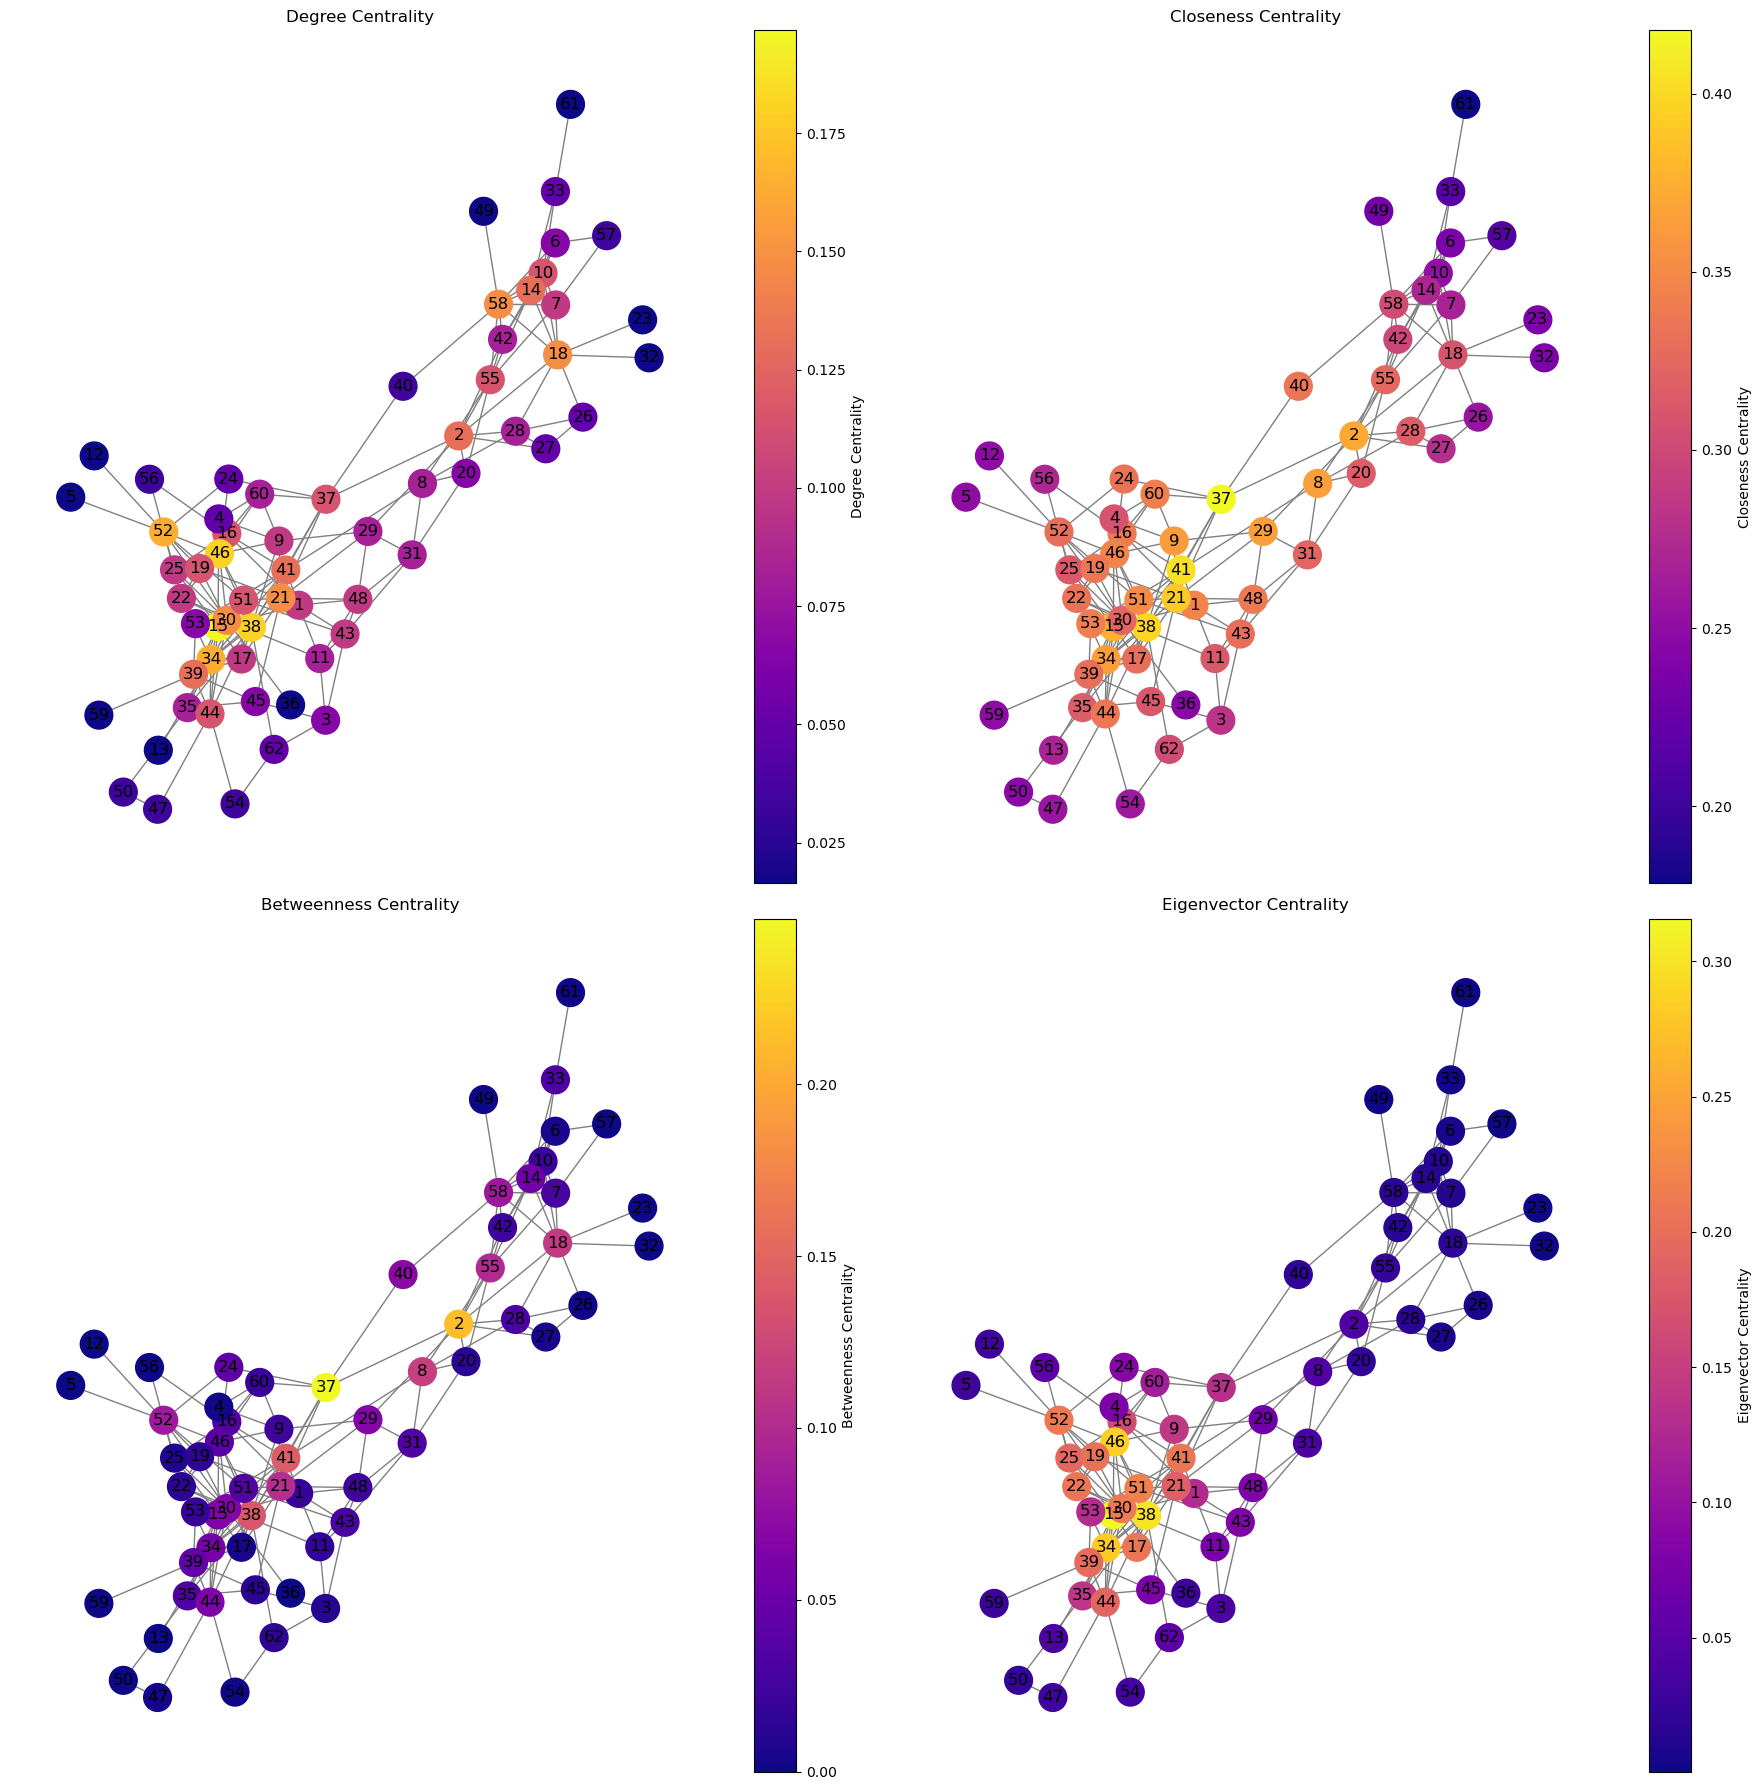

In [34]:
plt.figure(figsize=(18, 18))

node_size = 400


plt.subplot(2, 2, 1)
node_color = [degree_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")
plt.title("Degree Centrality")

plt.subplot(2, 2, 2)
node_color = [closeness_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Closeness Centrality")
plt.title("Closeness Centrality")

plt.subplot(2, 2, 3)
node_color = [betweenness_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Betweenness Centrality")
plt.title("Betweenness Centrality")


plt.subplot(2, 2, 4)
node_color = [eigenvector_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Eigenvector Centrality")
plt.title("Eigenvector Centrality")

plt.tight_layout()
plt.show()


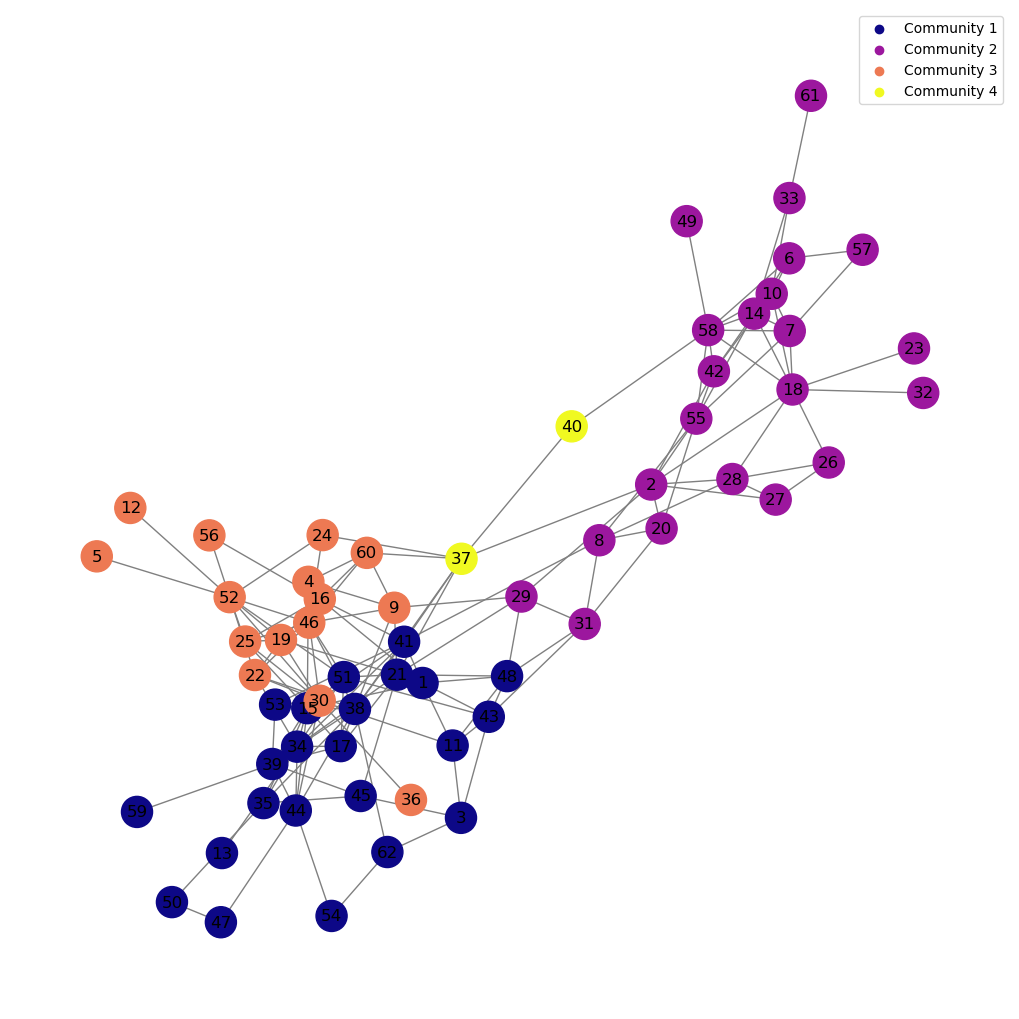

In [35]:
communities = list(greedy_modularity_communities(G))

community_colors = plt.cm.plasma(np.linspace(0, 1, len(communities)))
node_color = {}

for i, community in enumerate(communities):
    for node in community:
        node_color[node] = community_colors[i]


colors = [node_color[node] for node in G.nodes]


plt.figure(figsize=(10, 10))

nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, edge_color="gray")


for i, community in enumerate(communities):
    plt.scatter([], [], color=community_colors[i], label=f'Community {i+1}')

plt.legend()

plt.show()


In [36]:

cliques = list(nx.find_cliques(G))

triadic_closures = nx.triangles(G)


k_core_dict = {}
for k in range(1, max(dict(G.degree()).values()) + 1):
    k_core = nx.k_core(G, k=k)
    if k_core.number_of_nodes() > 0:
        k_core_dict[k] = k_core


clique_count = len(cliques)
triadic_closures_count = sum(triadic_closures.values()) // 3  # ogni triangolo viene contato tre volte
k_core_summary = {k: len(core.nodes) for k, core in k_core_dict.items()}

print('clique: ', clique_count)
print('triadic_closures: ', triadic_closures_count) 
print('k_core: ', k_core_summary) 


clique:  84
triadic_closures:  95
k_core:  {1: 62, 2: 53, 3: 45, 4: 36}


In [37]:

max_clique_size = max(len(clique) for clique in cliques)
largest_cliques = [clique for clique in cliques if len(clique) == max_clique_size]


max_k = max(k_core_dict.keys())
largest_k_core = k_core_dict[max_k]

ego_node = 19 # Sostituisci con l'id di un nodo
ego_network = nx.ego_graph(G, ego_node)  


print("Largest cliques:",largest_cliques)
print("Max k:", max_k)
print("Nodi nel largest k core:",list(largest_k_core.nodes))
print("Ego-network del nodo:", ego_node, ":", ego_network)


Largest cliques: [[7, 14, 58, 10, 18], [19, 46, 52, 30, 25], [19, 46, 52, 30, 22]]
Max k: 4
Nodi nel largest k core: [11, 1, 15, 16, 41, 43, 48, 18, 2, 20, 29, 37, 42, 55, 9, 60, 52, 10, 14, 58, 7, 8, 31, 21, 38, 46, 30, 34, 17, 25, 39, 44, 51, 53, 19, 22]
Ego-network del nodo: 19 : Graph with 8 nodes and 18 edges
